In [ ]:
%pip install pandas
%pip install matplotlib

In [2]:
from os import listdir
from typing import TypedDict, Literal
from pandas import read_csv, DataFrame
from matplotlib import pyplot

Defines what `data` looks like, it will be a dictionary of dictionaries.

In [3]:
'''
{
	'close_car': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'close_noCar': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'far_car': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
	'far_noCar': {
		'Bandwidth': data,
		'Frequency': data,
		'SpreadingFactor': data,
		'TxPower': data,
	},
}
'''

Settings = Literal['close_car'] | Literal['close_noCar'] | Literal['far_car'] | Literal['far_noCar']
Params = Literal['Bandwidth'] | Literal['Frequency'] | Literal['SpreadingFactor'] | Literal['TxPower']

class Params(TypedDict):
	Params: DataFrame

class Data(TypedDict):
	Settings: Params

In [4]:
data: Data = {}
names = ['Time','Number','S_Lat','S_Long','Bandwidth','CodingRate','Frequency','SpreadingFactor','TxPower','PacketRSSI','RSSI','SNR','R_Lat','R_Long']
for csv in listdir():
	if csv.endswith('csv'):
		skiprows = []
		with open(csv) as f:
			i = 0
			for line in f.readlines():
				if len(line.split(',')) != len(names):
					skiprows.append(i)
				i += 1
		# skip any row that does not have the right number of columns
		df = read_csv(csv, header=None, names=names, skiprows=skiprows)
		settings = csv.split('_')
		setting = '_'.join(settings[:2])
		param = settings[2].split('.')[0]
		if setting in data:
			data[setting][param] = df
		else:
			data[setting] = {param: df}

In [10]:
def plot(data: DataFrame, param: Params, subplot: int):
	pyplot.subplot(1, 4, subplot)
	powers = []
	for tx, df in data.groupby(param)['PacketRSSI']:
		if (subplot == 1):
			pyplot.ylabel('Packet RSSI')
		df.plot(xlabel='Number', title=param)
		powers.append(tx)
	pyplot.gca().legend(powers)

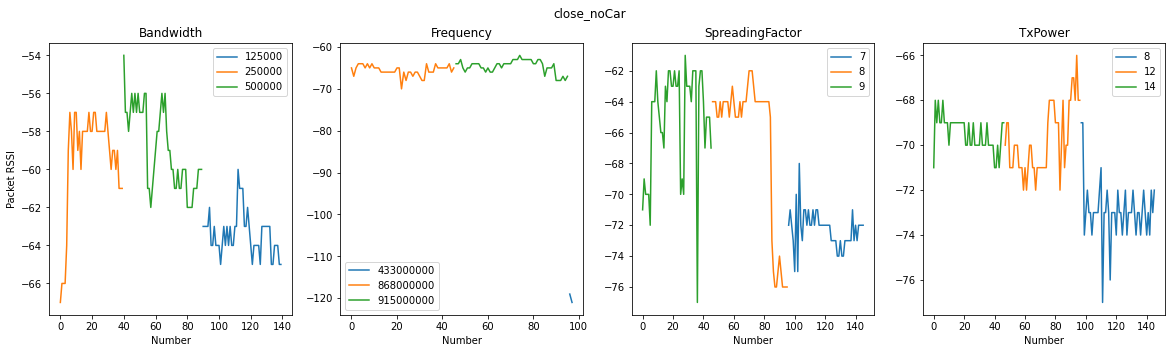

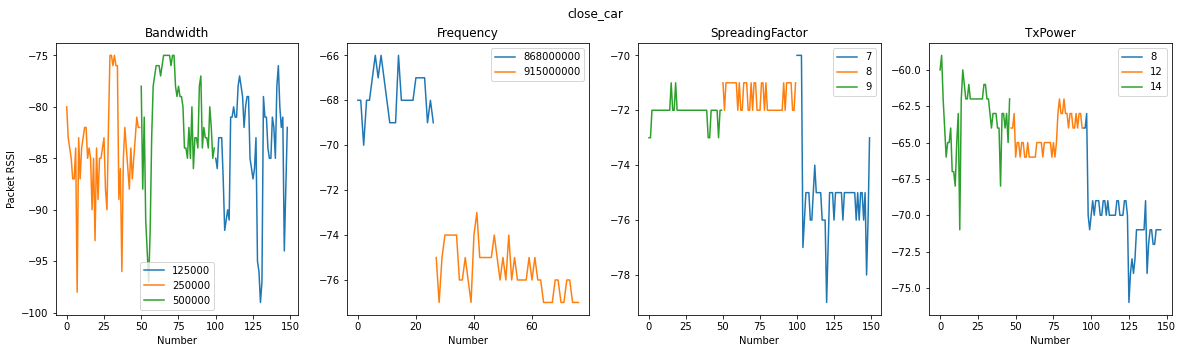

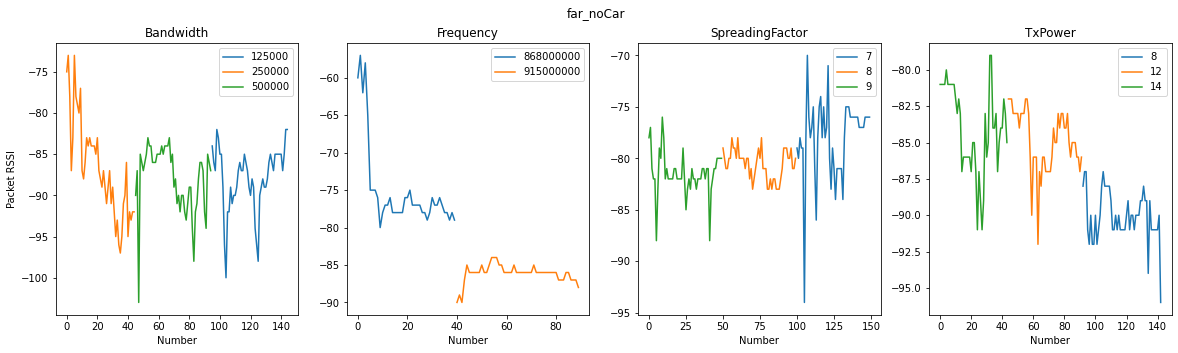

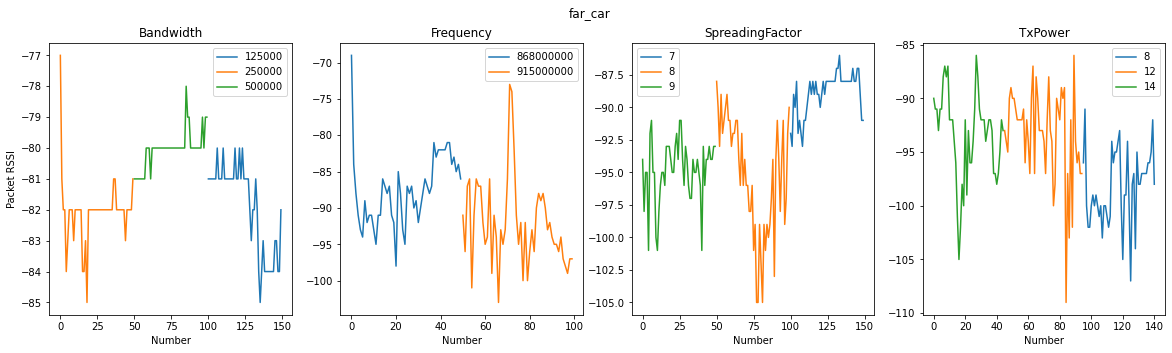

In [12]:
for setting, params in data.items():
	i = 1
	figure = pyplot.figure(figsize=(20,5))
	figure.suptitle(setting)
	for param, item in sorted(params.items()):
		plot(item, param, i)
		i += 1